## Business Case Study

In [86]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### Merging seperate csv files

In [181]:
#columns names in English
columns = ["Country identifier", "Order identifier", "Departure date", "Amount", "Category", "Product", "Ticket number", "Ticket issuance date", "Booking identifier", "Ticket route", "Airline code", "Booking channel", "Booking sub-channell", "Date of last segment", "New/Changed/Cancelled", "Destination"]

In [88]:
# iterate over all files within "TM_datafiles" folder (here: Travix_Business_Case folder)
for file in os.listdir("_._"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("_._", file), sep=';', skiprows=4)
        tmp.to_csv("merged.csv", index=False, header=False, mode='a')

In [182]:
#reading the merged data frame with translated to English names of columns
df = pd.read_csv("merged.csv", names = columns)
df.head()

,Country identifier,Order identifier,Departure date,Amount,Category,Product,Ticket number,Ticket issuance date,Booking identifier,Ticket route,Airline code,Booking channel,Booking sub-channell,Date of last segment,New/Changed/Cancelled,Destination
0,3,484336,19-12-2013,"-306,97",FLIGHT,Vliegticket,"6,70432E+12",1-12-2013,63FWQCM,LED/VKO/JFK/BOS,UN,NaN,NaN,19-12-2013,A,JFK
1,3,489855,5-1-2014,"391,85",FLIGHT,Vliegticket,"6,24463E+12",1-1-2014,5HFOHUM,ZRH/SAW/IKA/SAW/CGN,PC,NaN,NaN,18-1-2014,N,IKA
2,3,489779,12-1-2014,"106,2",FLIGHT,Vliegticket,"5,54634E+11",1-1-2014,49LBRRM,FCO/SUF/FCO,AZ,NaN,NaN,26-1-2014,N,SUF
3,3,489787,18-2-2014,"120,83",FLIGHT,Vliegticket,"1,64634E+11",1-1-2014,5DBSCTM,DEN/LAS,UA,NaN,NaN,18-2-2014,N,LAS
4,3,489787,18-2-2014,"120,83",FLIGHT,Vliegticket,"1,64634E+11",1-1-2014,5DBSCTM,DEN/LAS,UA,NaN,NaN,18-2-2014,N,LAS


In [90]:
#checking seperate datafiles to examine whether the final dataset was merged correctly
df_01012014 = pd.read_csv('Travix_Business_Case/01012014.csv', sep= ';', skiprows=5, names = ["Country identifier", "Order identifier", "Departure date", "Amount", "Category", "Product", "Ticket number", "Ticket issuance date", "Booking identifier", "Ticket route", "Airline code", "Booking channel", "Booking sub-channell", "Date of last segment", "New/Changed/Cancelled", "Destination"])
df_01012014.tail()

,Country identifier,Order identifier,Departure date,Amount,Category,Product,Ticket number,Ticket issuance date,Booking identifier,Ticket route,Airline code,Booking channel,Booking sub-channell,Date of last segment,New/Changed/Cancelled,Destination
2157,32,18858,12-6-2014,"21.492,00",FLIGHT,Vliegticket,A5GSK6OM003,1-1-2014,5GSK6OM,SVO/JFK/SVO,DL,momondo bua.ru,NaN,6-7-2014,N,JFK
2158,32,18858,12-6-2014,"21.492,00",FLIGHT,Vliegticket,A5GSK6OM002,1-1-2014,5GSK6OM,SVO/JFK/SVO,DL,momondo bua.ru,NaN,6-7-2014,N,JFK
2159,32,18858,1-1-2014,"3.482,23",OVERIGE,Boekingskosten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-2014,N,NaN
2160,32,18830,7-1-2014,"22.907,00",FLIGHT,Vliegticket,"1,57464E+12",1-1-2014,5CS4QTM,DME/DOH/BKK/DOH/DME,QR,momondo bua.ru,NaN,4-2-2014,N,BKK
2161,32,18830,1-1-2014,"1.343,91",OVERIGE,Boekingskosten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-2014,N,NaN


In [91]:
#checking whether the first row of a merged data set equals the first row from a file in a TM_datafiles folder. 
#The analysis below shows that the rows that do have any values (not NaN) are equal to each other
df_01012014.loc[1,:] == df.loc[1,:]

Country identifier        True
Order identifier          True
Departure date            True
Amount                    True
Category                  True
Product                   True
Ticket number             True
Ticket issuance date      True
Booking identifier        True
Ticket route              True
Airline code              True
Booking channel          False
Booking sub-channell     False
Date of last segment      True
New/Changed/Cancelled     True
Destination               True
Name: 1, dtype: bool

In [92]:
#same as above but for the last row of the first file in a TM_datafiles folder
df_01012014.iloc[-1,:] == df.loc[2161,:]

Country identifier        True
Order identifier          True
Departure date            True
Amount                    True
Category                  True
Product                   True
Ticket number            False
Ticket issuance date     False
Booking identifier       False
Ticket route             False
Airline code             False
Booking channel          False
Booking sub-channell     False
Date of last segment      True
New/Changed/Cancelled     True
Destination              False
Name: 2161, dtype: bool

### The benefit/loss due to cancellations and changes from 14.12.2013-13.01.2014. 


##### 14.12.2013 - 13.01.2014  dataset

In [94]:
#change the Departure date column to pandas datatime object
df['Departure date'] = pd.to_datetime(df['Departure date'])

In [95]:
df_tf = df[(df['Departure date'] >= '14-12-2013') & (df['Departure date'] <= '13-01-2014')]

In [96]:
df_tf

,Country identifier,Order identifier,Departure date,Amount,Category,Product,Ticket number,Ticket issuance date,Booking identifier,Ticket route,Airline code,Booking channel,Booking sub-channell,Date of last segment,New/Changed/Cancelled,Destination
0,3,484336,2013-12-19,"-306,97",FLIGHT,Vliegticket,"6,70432E+12",1-12-2013,63FWQCM,LED/VKO/JFK/BOS,UN,NaN,NaN,19-12-2013,A,JFK
5,3,489787,2014-01-01,"13,98",REISVERZEKERING,VLIEGTICKETGARANTIE IPP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-2014,N,NaN
6,3,489787,2014-01-01,41,OVERIGE,Boekingskosten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-2014,N,NaN
8,3,489798,2014-01-01,"16,4",REISVERZEKERING,KORTLOPENDE ANNULERINGSVERZEKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27-2-2014,N,NaN
9,3,489798,2014-01-01,"8,5",OVERIGE,Boekingskosten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1-2014,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100853,33,2148,2013-12-31,199,REISVERZEKERING,VLIEGTICKETGARANTIE IPP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-12-2013,N,NaN
100854,33,2148,2013-12-31,250,OVERIGE,Boekingskosten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-12-2013,N,NaN
100858,33,2150,2013-12-31,250,OVERIGE,Boekingskosten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-12-2013,N,NaN
100863,33,2147,2013-12-30,"544,7",REISVERZEKERING,VLIEGTICKETGARANTIE IPP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-12-2013,N,NaN


##### Analysis of the df_tf dataset

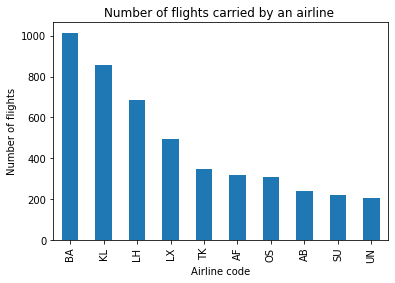

In [189]:
df_tf['Airline code'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title('Number of flights carried by an airline')
plt.xlabel('Airline code')
plt.ylabel('Number of flights')
plt.show()

In [193]:
df_tf.groupby('Booking channel')['Airline code'].nunique().sort_values(ascending=False).nlargest(10)

Booking channel
Skyscanner UK                 107
quickbooking skyscanner uk     74
Idealo.de                      63
Swoodoo.de                     59
Kayak.uk                       53
skyscanner.nl BNL Meta         47
skyscanner.de German Meta      43
Skyscanner.IE                  39
Swoodoo.ch                     33
Skyscanner.net in Spain        33
Name: Airline code, dtype: int64

In [199]:
df_tf['Ticket issuance date'] = pd.to_datetime(df_tf['Ticket issuance date'])
df_tf['Ticket issuance date'].value_counts().sort_values(ascending=False).nlargest(20)

2013-12-16    665
2013-12-18    646
2013-12-17    620
2013-12-13    609
2013-12-15    526
2013-12-19    526
2013-12-20    501
2013-12-14    489
2013-12-23    488
2013-12-21    414
2013-12-22    371
2013-12-25    367
2013-12-27    365
2013-12-24    361
2013-12-26    301
2013-12-28    240
2013-12-29    209
2013-12-30    179
2014-07-01    168
2014-09-01    159
Name: Ticket issuance date, dtype: int64

In [204]:
df_tf['Difference booking - departure'] = df_tf['Departure date'].dt.day - df_tf['Ticket issuance date'].dt.day

In [97]:
#counting how many flights were new, changed or cancelled 

#Nieuw - New (N)
#Wijziging - Changed (W)
#Annulering - Cancelled (A)

df_tf['New/Changed/Cancelled'].value_counts()

N    29403
W     1449
A      302
Name: New/Changed/Cancelled, dtype: int64

In [98]:
#checking whetehr there are any NaN values within a column
df_tf['New/Changed/Cancelled'].isnull().sum()

0

In [99]:
#selecting a part of dataframe where flights were only changed or cancelled
df_changed = df_tf[df_tf['New/Changed/Cancelled'] == 'W']
df_cancelled = df_tf[df_tf['New/Changed/Cancelled'] == 'A']
df_new = df_tf[df_tf['New/Changed/Cancelled'] == 'N']

In [100]:
#changing Amount column in each dataframe to series object
W = pd.Series(df_changed['Amount'])
A = pd.Series(df_cancelled['Amount'])
N = pd.Series(df_new['Amount'])

In [101]:
#function that changes each value in Amount column to float
def make_float(num):
    num = num.replace('.','').replace(',','.')
    return float(num)

In [102]:
df_changed['Amount'] = W.map(make_float)
df_cancelled['Amount'] = A.map(make_float)
df_new['Amount'] = N.map(make_float)

C:\Users\Oliwia1596\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Oliwia1596\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Oliwia1596\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

##### Calculated loss on changed flights

In [103]:
df_changed['Amount'].describe()

count      1449.000000
mean       -129.073713
std        4072.113609
min     -134717.810000
25%           0.000000
50%           0.000000
75%           0.000000
max       11322.000000
Name: Amount, dtype: float64

In [104]:
los_on_changed_flights = df_changed['Amount'].sum()
print(los_on_changed_flights)

-187027.81


##### Calculated loss on cancelled flights

In [105]:
df_cancelled['Amount'].describe()

count      302.000000
mean     -4979.034404
std      10959.228896
min     -57946.000000
25%      -1811.887500
50%       -525.095000
75%        -94.440000
max       8489.000000
Name: Amount, dtype: float64

In [106]:
loss_on_cancelled_flights = df_cancelled['Amount'].sum()
print(loss_on_cancelled_flights)

-1503668.39


##### Overall loss

In [107]:
overall_loss = loss_on_cancelled_flights + los_on_changed_flights
print(overall_loss)

-1690696.2


##### Gain on new flights

In [108]:
gain = df_new['Amount'].sum()
gain

15793226.59

###### Profit

In [109]:
profit = gain + overall_loss
profit

14102530.39

### Differences between airlines and possible reasons

##### Number of flights cancelled split by an airline 

In [110]:
#amount_of_flights_cancelled_by_airline 7 largest
cancelled_by_airline = df_cancelled['Airline code'].value_counts().loc[lambda x: x>9]
cancelled_by_airline

LH    25
UN    23
SU    19
9W    17
DL    12
KL    10
AI    10
Name: Airline code, dtype: int64

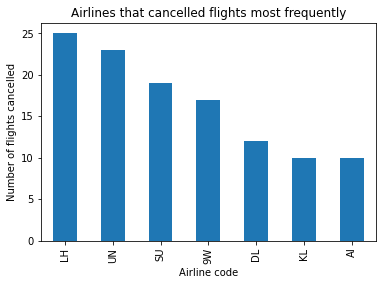

In [111]:
cancelled_by_airline.plot(kind='bar')
plt.title('Airlines that cancelled flights most frequently')
plt.xlabel('Airline code')
plt.ylabel('Number of flights cancelled')
plt.show()

##### Number of flights changed, split by an airline

In [112]:
#amount_of_flights_changed_by_airline 7 largest
changed_by_airline = df_changed['Airline code'].value_counts().loc[lambda x: x>25]
changed_by_airline

KL    98
LH    67
BA    60
TG    36
TK    32
QR    27
EK    27
Name: Airline code, dtype: int64

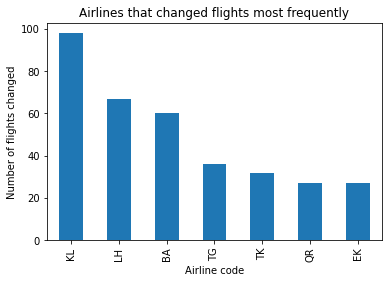

In [113]:
changed_by_airline.plot(kind='bar')
plt.title('Airlines that changed flights most frequently')
plt.xlabel('Airline code')
plt.ylabel('Number of flights changed')
plt.show()

##### Loss on cancelled flights, split by an airline

In [114]:
loss_by_airline_cancelled = df_cancelled.groupby('Airline code')['Amount'].sum()
largest_loss_by_airline_cancelled = loss_by_airline_cancelled.nsmallest(7)

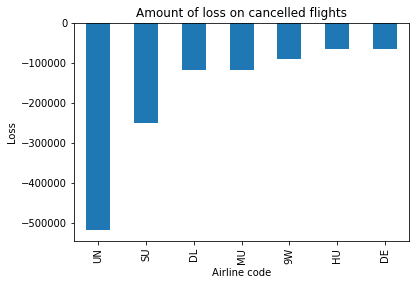

In [115]:
largest_loss_by_airline_cancelled.plot(kind='bar')
plt.title('Amount of loss on cancelled flights')
plt.xlabel('Airline code')
plt.ylabel('Loss')
plt.show()

##### Loss on changed flights, split by an airline

In [116]:
loss_by_airline_changed = df_changed.groupby('Airline code')['Amount'].sum()
largest_loss_by_airline_changed = loss_by_airline_changed.nsmallest(7)
largest_loss_by_airline_changed

Airline code
AI   -87265.17
BA   -65731.94
JU   -34305.00
KQ   -25998.00
AF    -9525.15
WY    -9144.00
UN    -2092.00
Name: Amount, dtype: float64

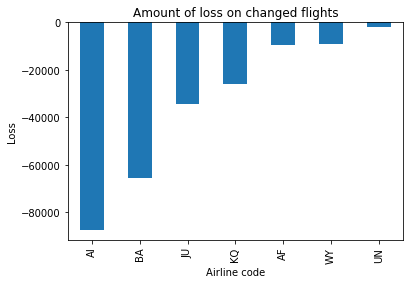

In [117]:
largest_loss_by_airline_changed.plot(kind='bar')
plt.title('Amount of loss on changed flights')
plt.xlabel('Airline code')
plt.ylabel('Loss')
plt.show()

### Analysis of seperate airlines

##### KLM

In [118]:
changed_by_KLM = df_changed[df_changed['Airline code']=='KL']
changed_by_KLM['Amount'].sum()

490.48

In [119]:
cancelled_and_changed = pd.concat([df_cancelled, df_changed], axis = 0)

In [120]:
cancelled_and_changed_by_KLM = cancelled_and_changed[cancelled_and_changed['Airline code']=='KL']
cancelled_and_changed_by_KLM['Amount'].sum()

-2982.04

In [121]:
cancelled_and_changed_by_KLM.groupby('Departure date')['Order identifier'].nunique()

Departure date
2013-12-14    3
2013-12-15    1
2013-12-16    1
2013-12-17    3
2013-12-18    4
2013-12-19    5
2013-12-20    5
2013-12-21    3
2013-12-23    2
2013-12-25    3
2013-12-26    4
2013-12-27    4
2013-12-28    4
2013-12-29    2
2013-12-30    3
2013-12-31    2
2014-01-01    1
2014-01-02    1
2014-01-03    2
2014-01-04    1
2014-01-13    1
Name: Order identifier, dtype: int64

In [122]:
cancelled_and_changed_by_KLM['Ticket route'].value_counts().nlargest(10)

MAD/AMS/MAD                    6
TLS/AMS                        5
/No flight details             4
IST/AMS/IST                    4
AMS/VIE/AMS                    4
LHR/AMS/LHR                    4
AGP/AMS/DEL/CDG/AGP            4
SAW/AMS/DTW/IND/DTW/AMS/SAW    4
VIE/AMS/VIE                    3
AMS/WAW/***/ATH/AMS            3
Name: Ticket route, dtype: int64

In [154]:
#calculating number of flights carried by KLM within a time period 
flights_by_KLM_tp = df_tf[df_tf['Airline code']=='KL']
summed_KLM = flights_by_KLM_tp.count()[0]

In [124]:
#calculating number of flights carried by KLM within a whole period
flights_by_KLM = df[df['Airline code']=='KL']
flights_by_KLM.count()[0] 

5867

In [152]:
#calculating number of flights cancelled by KLM within a time period
df_cancelled_by_KLM = df_cancelled[df_cancelled['Airline code']=='KL']
cancelled_KLM = df_cancelled_by_KLM.count()[0] 
cancelled_KLM 

10

In [153]:
#calculating number of flights changed by KLM within a time period
df_changed_by_KLM = df_changed[df_changed['Airline code']=='KL']
changed_KLM = df_changed_by_KLM.count()[0] 
changed_KLM 

98

In [155]:
#percentage of cancelled flights to overall number of flights made by KLM
round(cancelled_KLM/summed_KLM,2)

0.01

In [156]:
#percentage of changed flights to overall number of flights made by KLM
round(changed_KLM/summed_KLM,2)

0.11

##### Lufthansa

In [126]:
cancelled_and_changed_by_Lufthansa = cancelled_and_changed[cancelled_and_changed['Airline code']=='LH']

In [127]:
cancelled_and_changed_by_Lufthansa['Amount'].sum()

-10204.93

In [128]:
cancelled_and_changed_by_Lufthansa['Booking channel'].value_counts().nlargest(3)

Kayak.es      8
Idealo.de     8
Swoodoo.de    7
Name: Booking channel, dtype: int64

In [129]:
cancelled_and_changed_by_Lufthansa['Destination'].value_counts().nlargest(3)

DUB    8
GOT    8
FRA    6
Name: Destination, dtype: int64

In [130]:
#calculating number of flights carried by Lufthansa within a time period 
flights_by_Lufthansa_tp = df_tf[df_tf['Airline code']=='LH']
summed_LH = flights_by_Lufthansa_tp.count()[0]
summed_LH

685

In [131]:
#calculating number of flights carried by Lufthansa within a whole period
flights_by_Lufthansa = df[df['Airline code']=='LH']
flights_by_Lufthansa.count()[0] 

4529

In [132]:
#calculating number of flights cancelled by Lufthansa within a time period
df_cancelled_by_LH = df_cancelled[df_cancelled['Airline code']=='LH']
df_cancelled_by_LH = df_cancelled.count()[0] 

In [133]:
#calculating number of flights changed by Lufthansa within a time period
df_changed_by_LH = df_changed[df_changed['Airline code']=='LH']
changed_LH = df_changed_by_LH.count()[0] 

In [134]:
#percentage of cancelled flights to overall number of flights made by Lufthansa
round(cancelled_LH/summed_LH,2)

0.04

In [135]:
#percentage of changed flights to overall number of flights made by Lufthansa
round(changed_LH/summed_LH,2)

0.1

###### Air India

In [136]:
changed_by_AirIndia = df_changed[df_changed['Airline code']=='AI']

In [137]:
changed_by_AirIndia['Destination'].value_counts().nlargest(1)

DEL    6
Name: Destination, dtype: int64

In [138]:
changed_by_AirIndia['Departure date'].value_counts()

2013-12-14    6
2013-12-20    6
2013-12-17    4
2013-12-22    2
2013-12-31    2
2013-12-15    1
2013-12-21    1
Name: Departure date, dtype: int64

In [139]:
changed_by_AirIndia['Booking channel'].value_counts()

momondo bua.in         6
Skyscanner bua in      3
Skyscanner.net CH      3
skyscannerru bua.ru    1
Name: Booking channel, dtype: int64

In [140]:
df_changed['Destination'].value_counts().nlargest(3)

BKK    57
AMS    57
JFK    31
Name: Destination, dtype: int64

###### Transaero

In [141]:
cancelled_by_Transaero = df_cancelled[df_cancelled['Airline code']=='UN']

In [142]:
cancelled_by_Transaero['Destination'].value_counts()

JFK    8
VIE    4
MIA    3
VKO    2
HAV    2
LAX    2
LYS    1
PFO    1
Name: Destination, dtype: int64

In [143]:
cancelled_by_Transaero[cancelled_by_Transaero['Destination']=='JFK'].head()

,Country identifier,Order identifier,Departure date,Amount,Category,Product,Ticket number,Ticket issuance date,Booking identifier,Ticket route,Airline code,Booking channel,Booking sub-channell,Date of last segment,New/Changed/Cancelled,Destination
0,3,484336,2013-12-19,-306.97,FLIGHT,Vliegticket,"6,70432E+12",1-12-2013,63FWQCM,LED/VKO/JFK/BOS,UN,NaN,NaN,19-12-2013,A,JFK
100671,32,17109,2013-12-27,-20906.00,FLIGHT,Vliegticket,"6,71E+12",3-12-2013,7W9BVXM,VKO/JFK/VKO,UN,skyscanner bua.ru mobile,NaN,11-1-2014,A,JFK
100673,32,17609,2013-12-22,-21282.00,FLIGHT,Vliegticket,"6,71E+12",10-12-2013,3GUSHAM,VKO/JFK/VKO,UN,momondo bua.ru,NaN,6-1-2014,A,JFK
100677,32,14448,2013-12-29,-21281.40,FLIGHT,Vliegticket,"6,71E+12",12-10-2013,3FLJV9M,VKO/JFK,UN,skyscannerru bua.ru,fqn4yjMaEeO6egBQVpArCA,29-12-2013,A,JFK
100678,32,14448,2013-12-29,-21281.40,FLIGHT,Vliegticket,"6,71E+12",12-10-2013,3FLJV9M,VKO/JFK,UN,skyscannerru bua.ru,fqn4yjMaEeO6egBQVpArCA,29-12-2013,A,JFK


### Seasonality

##### changed flights

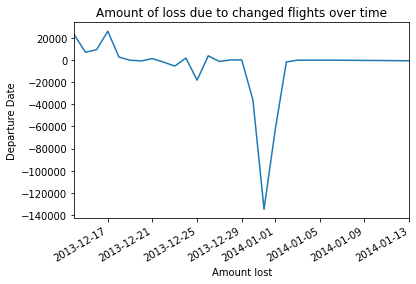

In [157]:
#visualizing trends 
df_changed.groupby('Departure date')['Amount'].sum().plot()
plt.title('Amount of loss due to changed flights over time')
plt.xlabel('Departure Date')
plt.ylabel('Amount lost')
plt.show()

In [161]:
#Overall loss on the day of the drop
df_changed[df_changed['Departure date'] == '31-12-2013']['Amount'].sum()
#add the airline which caused this drop

-134863.74999999997

In [165]:
#calculating how many flights were changed that day
date_drop = df_changed[df_changed['Departure date'] == '31-12-2013']
number_of_flights_1 = date_drop.count()[0]
number_of_flights_1

56

In [177]:
#calculating which airline caused the largest drop in loss of money
date_drop.groupby('Airline code')['Amount'].sum().sort_values().nsmallest(5)

Airline code
AI   -134717.81
SQ      -188.50
KL       -67.71
AF         0.00
AV         0.00
Name: Amount, dtype: float64

##### cancelled flights

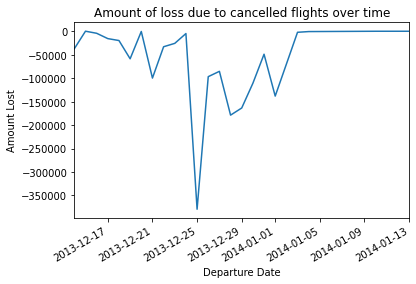

In [159]:
#visualizing trends 
df_cancelled.groupby('Departure date')['Amount'].sum().plot()
plt.title('Amount of loss due to cancelled flights over time')
plt.xlabel('Departure Date')
plt.ylabel('Amount Lost')
plt.show()

In [174]:
#Overall loss on the day of the drop due to cancelled flights
df_cancelled[df_cancelled['Departure date']=='25-12-2013']['Amount'].sum()

-379432.99

In [169]:
#calculating how many flights were changed that day
date_drop_cancelled = df_cancelled[df_cancelled['Departure date']=='25-12-2013']
number_of_flights_2 = date_drop_cancelled.count()[0]
number_of_flights_2

33

In [178]:
#calculating which airline caused the largest drop in loss of money
date_drop_cancelled.groupby('Airline code')['Amount'].sum().sort_values().nsmallest(5)

Airline code
MU   -115892.00
SU   -114376.35
HU    -65660.23
UN    -43566.00
KE    -34445.00
Name: Amount, dtype: float64